# Exact solution of 2D Ising model
References:
* B. Kaufman, Phys. Rev. 76, 1232 (1949).
* A. E. Ferdinand and M. P. A. Fisher, Phys. Rev. 185, 832 (1969).
* Statistical Mechanics, Third Edition by R K Pathria and Paul D. Beale. (Ch 13.4)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# parameters
J = 1
kB = 1
Tc = 2/np.log(1+np.sqrt(2))
Kc = np.log(1+np.sqrt(2))/2

### $c$ function and its derivatives
The $c$ function is defined as: (Eq 2.4, PRB 1969)
$$
  c_r =\cosh(2K)\coth(2K) - \cos\left(\frac{r \pi}{n}\right) 
  = \frac{\cosh(2K)^2}{\sinh(2K)} - \cos\left(\frac{r \pi}{n}\right)
  = \sinh(2K) + \frac{1}{\sinh(2K)} - \cos\left(\frac{r \pi}{n}\right).
$$

The first and second deratives of $c_r$ are: (they are independent of $r$ so we can drop the subscript.)

$$
\DeclareMathOperator{\csch}{csch}
  c^\prime = c^\prime_r = \cosh(2K)[4-2\csch^2(2K)] = 2 \cosh(2K)\left(1-\frac{1}{\sinh(2K)^2}\right).
$$

$$
  c^{\prime\prime} = c^{\prime\prime}_r = 8\csch(2K)^3 \cosh(2K)^2+4(\sinh(2K)-\csch(2K))
  =  \frac{8\cosh(2K)^2}{\sinh(2K)^3} + 4\left( \sinh(2K) - \frac{1}{\sinh(2K)} \right).
$$

### $\gamma$ function and its derivatives
$\gamma$ and $c$ related by the equation $\cosh(\gamma_l)=c_l$, (Eq 2.4, PRB 1969) so that
$$ 
  \gamma_0 = 2K + \ln(\tanh(K)). 
$$
$$ 
  \gamma_r  =\text{arccosh}(c_r) = \ln \left( c_r + (c^2_r-1)^{1/2} \right), l \neq 0. 
$$
Note that there are sign ambituity. The equations above are the correct choices. 
For example one **should not** choose $\gamma_0 = \ln \left( c_0 + (c^2_0-1)^{1/2} \right)$. c.f. Fig3 of Phys. Rev. 76, 1232 (1949).

Note that $\gamma_l = \gamma_{2n-l}$ and for $0\le l\le n$ the function $\gamma_l$ is monotonically increasing in $l$.

The first deratives of $\gamma_r$ are:
$$ 
  \gamma^\prime_0 = 2 + \frac{1}{\tanh(K)} \frac{1}{\cosh^2(K)}
  = 2 + \frac{2}{\sinh(2K)}
  = 2 (1 + \frac{1}{\sinh(2K)}).
$$

$$
  \gamma^\prime_r = \frac{c^\prime_r}{\sqrt{c^2_r-1}} = c^\prime (c^2_r-1)^{-1/2}.
$$

The second deratives of $\gamma_r$ are:

$$
  \gamma_0^{\prime\prime} 
  = -4 \csch(2K) \coth(2K)
  = -4 \frac{\cosh{2K}}{\sinh(2K)^2}.
$$

$$
  \gamma_r^{\prime\prime} = \frac{c_r^{\prime\prime}}{\sqrt{c^2-1}} - \frac{ (c^\prime_r)^2 c_r }{ (c^2_r-1)^{3/2} }
  = c^{\prime\prime} (c^2_r-1)^{-1/2} - (c^\prime)^2 c_r (c^2_r-1)^{-3/2}
$$

### $Z_1, Z_2, Z_3, Z_4$
The canonical partition function reads:
$$
  Z(K) = \frac{1}{2} \left(2\sinh(2K)\right)^{mn/2} (Z_1(K) + Z_2(K) + Z_3(K) + Z_4(K)),
$$
where
$$ Z_1(K) = \prod_{r=0}^{n-1} 2\cosh(\frac{m}{2} \gamma_{2r+1}), \; Z_2(K) = \prod_{r=0}^{n-1} 2\sinh(\frac{m}{2} \gamma_{2r+1}), $$
$$ Z_3(K) = \prod_{r=0}^{n-1} 2\cosh(\frac{m}{2} \gamma_{2r1}), \; Z_4(K) = \prod_{r=0}^{n-1} 2\sinh(\frac{m}{2} \gamma_{2r1}). $$

Note that $Z_4$ changes sign at critical point. $Z_1, Z_2, Z_3$ are alwayas positive. 

### $\log(Z)$
The log of the partition function reads:
$$
  \frac{\ln Z}{mn}=  \frac{1}{mn} \ln( \frac{1}{2} ) + \frac{1}{2} \ln( 2\sinh(2K) ) + \ln(Z1(K)+Z2(K)+Z3(K)+Z4(K)),
$$
or
$$
  \frac{\ln Z}{mn} = \frac{1}{mn} \ln( \frac{1}{2} ) + \frac{1}{2} \ln( 2\sinh(2K) ) 
  + \ln(Z1(K))
  + \ln\left[ 1+ \frac{Z2(K)}{Z1(K)}+\frac{Z3(K)}{Z1(K)}+\frac{Z4(K)}{Z1(K)} \right].
$$

### $\frac{Z^\prime_1}{Z_1}, \frac{Z^\prime_2}{Z_2}, \frac{Z^\prime_3}{Z_3}, \frac{Z^\prime_4}{Z_4}$

$$ 
  \frac{Z^\prime_1}{Z_1} = \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \tanh\left( \frac{m}{2}\gamma_{2r+1} \right), \;
  \frac{Z^\prime_2}{Z_2} = \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \coth\left( \frac{m}{2}\gamma_{2r+1} \right).
$$

$$
  \frac{Z^\prime_3}{Z_3} = \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \tanh\left( \frac{m}{2}\gamma_{2r} \right), \;
  \frac{Z^\prime_4}{Z_4} = \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \tanh\left( \frac{m}{2}\gamma_{2r} \right).
$$

### $\frac{Z^{\prime\prime}_1}{Z_1}, \frac{Z^{\prime\prime}_2}{Z_2}, \frac{Z^{\prime\prime}_3}{Z_3}, \frac{Z^{\prime\prime}_4}{Z_4}$

$$
  \frac{Z^{\prime\prime}_1}{Z_1} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \tanh\left( \frac{m}{2}\gamma_{2r+1} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left[ \gamma^{\prime \prime} \tanh\left( \frac{m}{2}\gamma_{2r+1} \right)
  + \frac{m}{2} \gamma^{\prime} \cosh^{-2}\left( \frac{m}{2}\gamma_{2r+1} \right) \right],
$$

$$
  \frac{Z^{\prime\prime}_2}{Z_2} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \coth\left( \frac{m}{2}\gamma_{2r+1} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left[ \gamma^{\prime \prime} \coth\left( \frac{m}{2}\gamma_{2r+1} \right)
  - \frac{m}{2} \gamma^{\prime} \sinh^{-2}\left( \frac{m}{2}\gamma_{2r+1} \right) \right],
$$

$$
  \frac{Z^{\prime\prime}_3}{Z_3} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \tanh\left( \frac{m}{2}\gamma_{2r} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left[ \gamma^{\prime \prime} \tanh\left( \frac{m}{2}\gamma_{2r} \right)
  + \frac{m}{2} \gamma^{\prime} \cosh^{-2}\left( \frac{m}{2}\gamma_{2r} \right) \right],
$$

$$
  \frac{Z^{\prime\prime}_4}{Z_4} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \coth\left( \frac{m}{2}\gamma_{2r} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left[ \gamma^{\prime \prime} \coth\left( \frac{m}{2}\gamma_{2r} \right)
  - \frac{m}{2} \gamma^{\prime} \sinh^{-2}\left( \frac{m}{2}\gamma_{2r} \right) \right].
$$

## Energy per site
$$
  \frac{U_{nm}}{nm} = - \frac{1}{nm} J \frac{d}{dK} \ln Z_{nm}
  =-J \coth(2K) - \frac{J}{mn} \frac{Z_1^\prime(K)+Z_2^\prime(K)+Z_3^\prime(K)+Z_4^\prime(K)}{Z_1(K)+Z_2(K)+Z_3(K)+Z_4(K)}
  =-J \coth(2K) - \frac{J}{mn} 
  \frac{\frac{Z_1^\prime}{Z_1}+\frac{Z_2^\prime}{Z_2}\frac{Z_2}{Z_1}+\frac{Z_3^\prime}{Z_3}\frac{Z_3}{Z_1}+\frac{Z_4^\prime}{Z_4}\frac{Z_4}{Z_1}}
  {1+\frac{Z_2}{Z_1}+\frac{Z_2}{Z_1}+\frac{Z_3}{Z_1}+\frac{Z_4}{Z_1}}.
$$

## Specific heat pe site
$$
  \frac{C_{nm}}{nm} = \frac{1}{nm} K^2 \frac{d^2}{dK^2} \ln Z_{nm}
  = -\frac{2K^2}{\sinh(2K)^2} + \frac{K^2}{nm} 
  \left[ 
    \frac{Z^{\prime\prime}_1 + Z^{\prime\prime}_2 + Z^{\prime\prime}_3 + Z^{\prime\prime}_4}{Z_1 + Z_2 + Z_3 + Z_4}
    - 
    \left[\frac{Z^{\prime}_1 + Z^{\prime}_2 + Z^{\prime}_3 + Z^{\prime}_4}{Z_1 + Z_2 + Z_3 + Z_4}\right]^2
  \right]
$$

## Problem-1

Plot $\ln Z$, $\frac{E}{mn}$, $\frac{C}{mn}$ as a function of temperature $T$ for $m=n=2, 4, 8$, etc. What is the largest size you can reach without overflow?

![Alt text](FSS.png)

In [4]:
def c(l,T,m,n):
    return np.cosh(2/T)*1/np.tanh(2/T)-np.cos(l*np.pi/n)
def r_0(T):
    return 2/T +np.log(np.tanh(1/T))
def r(l,T,m,n):
    if l==0:
        print("l cant be zero")
    else:
        return np.arccosh(c(l,T,m,n))
    
def Z_1(T,m,n):
    for i in range(n):
        if i==0:
            a=2*np.cosh(m*r(1,T,m,n)/2)
        else:
            a=a*2*np.cosh(m*r(2*i+1,T,m,n)/2)
        return a
def Z_2(T,m,n):
    for i in range(n):
        if i==0:
            a=2*np.sinh(m*r(1,T,m,n)/2)
        else:
            a=a*2*np.sinh(m*r(2*i+1,T,m,n)/2)
        return a
    
def Z_3(T,m,n):
    for i in range(n):
        if i==0:
            a=2*np.cosh(m*r_0(T)/2)
        else:
            a=a*2*np.cosh(m*r(2*i,T,m,n)/2)
        return a
def Z_4(T,m,n):
    for i in range(n):
        if i==0:
            a=2*np.sinh(m*r_0(T)/2)
        else:
            a=a*2*np.sinh(m*r(2*i,T,m,n)/2)
        return a
def lnZ(T,m,n):
    a=np.log(Z_1(T,m,n)+Z_2(T,m,n)+Z_3(T,m,n)+Z_4(T,m,n))
    return (1/2)*np.sinh(2/T)*a


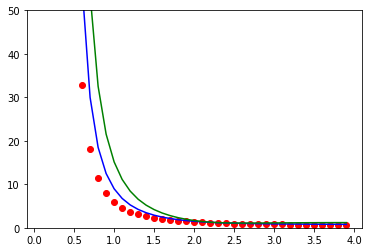

In [5]:
S2=[]
S4=[]
S8=[]
T=[]
for i in range(40):
    if i==0:
        pass
    else:
        T.append(i/10)
        S2.append(lnZ(i/10,2,2))
        S4.append(lnZ(i/10,4,4))
        S8.append(lnZ(i/10,8,8))
plt.ylim(0,50)
plt.plot(T,S2,'ro',T,S4,'b',T,S8,'g')

In [6]:
def Dc(T):
    return 2*np.cosh(2/T)*(1-1/np.sinh(2/T))
def Dr_0(T):
    return 2+2/np.sinh(2/T)
def Dr(l,T,m,n):
    return Dc(T)/(c(l,T,m,n)**2-1)**(1/2)
    
def DZ1_Z1(T,m,n):
    for i in range(n):
        a=2*m*Dr(2*i+1,T,m,n)*np.tanh(m*r(2*i+1,T,m,n)/2)
        if i==0:
            b=a
        else:
            b+=a
    return b
def DZ2_Z2(T,m,n):
    for i in range(n):
        a=2*m*Dr(2*i+1,T,m,n)*1/np.tanh(m*r(2*i+1,T,m,n)/2)
        if i==0:
            b=a
        else:
            b+=a
    return a
def DZ3_Z3(T,m,n):
    for i in range(n):
        if i==0:
            a=2*m*Dr_0(T)*np.tanh(m*r_0(T)/2)
        else:
            a=a+2*m*Dr(2*i,T,m,n)*np.tanh(m*r(2*i,T,m,n)/2)
    return a
def DZ4_Z4(T,m,n):
    for i in range(n):
        if i==0:
            a=2*m*Dr_0(T)*1/np.tanh(m*r_0(T)/2)
        else:
            a=a+2*m*Dr(2*i,T,m,n)*1/np.tanh(m*r(2*i,T,m,n)/2)
    return a    

In [7]:
def U_avg(T,m,n):
    c=(DZ1_Z1(T,m,n)*Z_1(T,m,n)+DZ2_Z2(T,m,n)*Z_2(T,m,n)+DZ3_Z3(T,m,n)*Z_3(T,m,n)+DZ4_Z4(T,m,n)*Z_4(T,m,n))/Z_1(T,m,n)
    a=1/np.tanh(2/T)
    b=1+2*Z_2(T,m,n)/Z_1(T,m,n)+Z_3(T,m,n)/Z_1(T,m,n)+Z_4(T,m,n)/Z_1(T,m,n)
    return -1*J*(a+c/(n*m*b))

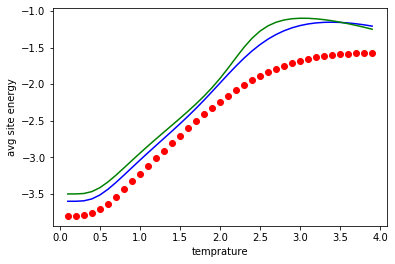

In [8]:
S2=[]
S4=[]
S8=[]
T=[]
for i in range(40):
    if i==0:
        pass
    else:
        T.append(i/10)
        S2.append(U_avg(i/10,2,2))
        S4.append(U_avg(i/10,4,4))
        S8.append(U_avg(i/10,8,8))
#plt.ylim(0,5)
plt.xlabel("temprature")
plt.ylabel("avg site energy")
plt.plot(T,S2,'ro',T,S4,'b',T,S8,'g')

### $\gamma$ function and its derivatives
$\gamma$ and $c$ related by the equation $\cosh(\gamma_l)=c_l$, (Eq 2.4, PRB 1969) so that
$$ 
  \gamma_0 = 2K + \ln(\tanh(K)). 
$$
$$ 
  \gamma_r  =\text{arccosh}(c_r) = \ln \left( c_r + (c^2_r-1)^{1/2} \right), l \neq 0. 
$$
Note that there are sign ambituity. The equations above are the correct choices. 
For example one **should not** choose $\gamma_0 = \ln \left( c_0 + (c^2_0-1)^{1/2} \right)$. c.f. Fig3 of Phys. Rev. 76, 1232 (1949).

Note that $\gamma_l = \gamma_{2n-l}$ and for $0\le l\le n$ the function $\gamma_l$ is monotonically increasing in $l$.


The first deratives of $\gamma_r$ are:
$$ 
  \gamma^\prime_0 = 2 + \frac{1}{\tanh(K)} \frac{1}{\cosh^2(K)}
  = 2 + \frac{2}{\sinh(2K)}
  = 2 (1 + \frac{1}{\sinh(2K)}).
$$

$$
  \gamma^\prime_r = \frac{c^\prime_r}{\sqrt{c^2_r-1}} = c^\prime (c^2_r-1)^{-1/2}.
$$

The second deratives of $\gamma_r$ are:

$$
  \gamma_0^{\prime\prime} 
  = -4 \csch(2K) \coth(2K)
  = -4 \frac{\cosh{2K}}{\sinh(2K)^2}.
$$

$$
  \gamma_r^{\prime\prime} = \frac{c_r^{\prime\prime}}{\sqrt{c^2-1}} - \frac{ (c^\prime_r)^2 c_r }{ (c^2_r-1)^{3/2} }
  = c^{\prime\prime} (c^2_r-1)^{-1/2} - (c^\prime)^2 c_r (c^2_r-1)^{-3/2}
$$

### $c$ function and its derivatives
The $c$ function is defined as: (Eq 2.4, PRB 1969)
$$
  c_r =\cosh(2K)\coth(2K) - \cos\left(\frac{r \pi}{n}\right) 
  = \frac{\cosh(2K)^2}{\sinh(2K)} - \cos\left(\frac{r \pi}{n}\right)
  = \sinh(2K) + \frac{1}{\sinh(2K)} - \cos\left(\frac{r \pi}{n}\right).
$$

The first and second deratives of $c_r$ are: (they are independent of $r$ so we can drop the subscript.)

$$
\DeclareMathOperator{\csch}{csch}
  c^\prime = c^\prime_r = \cosh(2K)[4-2\csch^2(2K)] = 2 \cosh(2K)\left(1-\frac{1}{\sinh(2K)^2}\right).
$$

$$
  c^{\prime\prime} = c^{\prime\prime}_r = 8\csch(2K)^3 \cosh(2K)^2+4(\sinh(2K)-\csch(2K))
  =  \frac{8\cosh(2K)^2}{\sinh(2K)^3} + 4\left( \sinh(2K) - \frac{1}{\sinh(2K)} \right).
$$

In [11]:
def D2c(T):
    a=(8*(np.cosh(2/T))**2)*(np.sinh(2/T)**-3)
    b=4*(np.sinh(2/T)-1/np.sinh(2/T))
    return a+b
def D2r_0(T):
    return -4*np.cosh(2/T)*(np.sinh(2/T)**-2)
def D2r(l,T,m,n):
    a=D2c(T)/((c(l,T,m,n)**2-1)**(1/2))
    b=((Dc(T)**2)*c(l,T,m,n))/((c(l,T,m,n)**2-1)**(3/2))
    return a-b
def D2Z1(T,m,n):
    a=0
    b=0
    for i in range(n):
        a+=(m/2)*(Dr(2*i+1,T,m,n)*np.tanh(m*r(2*i+1,T,m,n)/2))
        b+=(m/2)*(D2r(2*i+1,T,m,n)*np.tanh(m*r(2*i+1,T,m,n)/2)+(m/2)*(Dr(2*i+1,T,m,n)*(1/np.cosh(0.5*m*r(2*i+1,T,m,n))))**2)
    return a**2+b
def D2Z2(T,m,n):
    a=0
    b=0
    for i in range(n):
        a+=(m/2)*(Dr(2*i+1,T,m,n)*1/np.tanh(m*r(2*i+1,T,m,n)/2))
        b+=(m/2)*(D2r(2*i+1,T,m,n)*1/np.tanh(m*r(2*i+1,T,m,n)/2)-(m/2)*(Dr(2*i+1,T,m,n)*1/np.sinh(0.5*m*r(2*i+1,T,m,n)))**2)
    return a**2+b
def D2Z3(T,m,n):
    for i in range(n):
        if i==0:
            a=(m/2)*(Dr_0(T)*np.tanh(m*r_0(T)/2))
            b=(m/2)*(D2r_0(T)*np.tanh(m*r_0(T))+(m/2)*(Dr_0(T)*1/np.cosh(0.5*m*r_0(T)))**2)
        else:
            a+=(m/2)*(Dr(2*i,T,m,n)*np.tanh(m*r(2*i,T,m,n)/2))
            b+=(m/2)*(D2r(2*i,T,m,n)*np.tanh(m*r(2*i,T,m,n)/2)+(m/2)*(Dr(2*i+1,T,m,n)*(1/np.cosh(0.5*m*r(2*i,T,m,n))))**2)
    return a**2+b

def D2Z4(T,m,n):
    for i in range(n):
        if i==0:
            a=(m/2)*(Dr_0(T)*1/np.tanh(m*r_0(T)/2))
            b=(m/2)*(D2r_0(T)*1/np.tanh(m*r_0(T)/2)-(m/2)*(Dr_0(T)*(1/np.sinh(0.5*m*r_0(T))))**2)
        else:
            a+=(m/2)*(Dr(2*i,T,m,n)*1/np.tanh(m*r(2*i,T,m,n)/2))
            b+=(m/2)*(D2r(2*i,T,m,n)*1/np.tanh(m*r(2*i,T,m,n)/2)-(m/2)*(Dr(2*i,T,m,n)*1/np.sinh(0.5*m*r(2*i,T,m,n)))**2)
    return a**2+b

### $\frac{Z^{\prime\prime}_1}{Z_1}, \frac{Z^{\prime\prime}_2}{Z_2}, \frac{Z^{\prime\prime}_3}{Z_3}, \frac{Z^{\prime\prime}_4}{Z_4}$

$$
  \frac{Z^{\prime\prime}_1}{Z_1} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \tanh\left( \frac{m}{2}\gamma_{2r+1} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left[ \gamma^{\prime \prime} \tanh\left( \frac{m}{2}\gamma_{2r+1} \right)
  + \frac{m}{2} \gamma^{\prime} \cosh^{-2}\left( \frac{m}{2}\gamma_{2r+1} \right) \right],
$$

$$
  \frac{Z^{\prime\prime}_2}{Z_2} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \coth\left( \frac{m}{2}\gamma_{2r+1} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left[ \gamma^{\prime \prime} \coth\left( \frac{m}{2}\gamma_{2r+1} \right)
  - \frac{m}{2} \gamma^{\prime} \sinh^{-2}\left( \frac{m}{2}\gamma_{2r+1} \right) \right],
$$

$$
  \frac{Z^{\prime\prime}_3}{Z_3} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \tanh\left( \frac{m}{2}\gamma_{2r} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left[ \gamma^{\prime \prime} \tanh\left( \frac{m}{2}\gamma_{2r} \right)
  + \frac{m}{2} \gamma^{\prime} \cosh^{-2}\left( \frac{m}{2}\gamma_{2r} \right) \right],
$$

$$
  \frac{Z^{\prime\prime}_4}{Z_4} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \coth\left( \frac{m}{2}\gamma_{2r} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left[ \gamma^{\prime \prime} \coth\left( \frac{m}{2}\gamma_{2r} \right)
  - \frac{m}{2} \gamma^{\prime} \sinh^{-2}\left( \frac{m}{2}\gamma_{2r} \right) \right].
$$

In [12]:
def avg_C(T,m,n):
    a=1/np.sinh(2/T)
    b=D2Z1(T,m,n)*Z_1(T,m,n)+D2Z2(T,m,n)*Z_2(T,m,n)+D2Z3(T,m,n)*Z_3(T,m,n)+D2Z4(T,m,n)*Z_4(T,m,n)
    c=DZ1_Z1(T,m,n)*Z_1(T,m,n)+DZ2_Z2(T,m,n)*Z_2(T,m,n)+DZ3_Z3(T,m,n)*Z_3(T,m,n)+DZ4_Z4(T,m,n)*Z_4(T,m,n)
    d=Z_1(T,m,n)+Z_2(T,m,n)+Z_3(T,m,n)+Z_4(T,m,n)
    return (1/T**2)*(-2*a**2+(1/(n*m))*((b/d)-(c/d)**2))
avg_C(1,2,2)

-28.26080199356317

## Specific heat pe site
$$
  \frac{C_{nm}}{nm} = \frac{1}{nm} K^2 \frac{d^2}{dK^2} \ln Z_{nm}
  = -\frac{2K^2}{\sinh(2K)^2} + \frac{K^2}{nm} 
  \left[ 
    \frac{Z^{\prime\prime}_1 + Z^{\prime\prime}_2 + Z^{\prime\prime}_3 + Z^{\prime\prime}_4}{Z_1 + Z_2 + Z_3 + Z_4}
    - 
    \left[\frac{Z^{\prime}_1 + Z^{\prime}_2 + Z^{\prime}_3 + Z^{\prime}_4}{Z_1 + Z_2 + Z_3 + Z_4}\right]^2
  \right]
$$

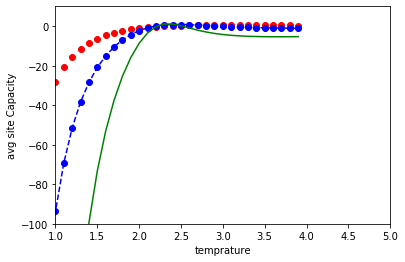

In [13]:
S2=[]
S4=[]
S8=[]
T=[]
for i in range(40):
    if i==0:
        pass
    else:
        T.append(i/10)
        S2.append(avg_C(i/10,2,2))
        S4.append(avg_C(i/10,4,4))
        S8.append(avg_C(i/10,8,8))
plt.xlim(1,5)
plt.ylim(-100,10)

plt.xlabel("temprature")
plt.ylabel("avg site Capacity")
plt.plot(T,S2,'ro',T,S4,'b--o',T,S8,'g')